In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,Y = make_classification(n_classes = 2, n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)


In [3]:
# Convert our Y-Labels into {1,-1}

Y[Y==0] = -1
print(Y)


[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

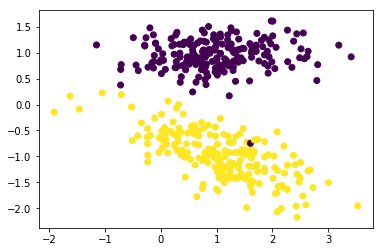

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
class SVM:
    
    def __init__(self,C=1.0):
        
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        
        loss =0
        
        loss += .5*np.dot(W,W.T)
        
        
        
        m = X.shape[0]
        
        for i in range(m):
            
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_Itr = 300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n= learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here
        # Weight and Bais Update rule
        
        losses = []
        
        for i in range(max_Itr):
            
            # Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Decent(Research Paper) with random shuffling
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in mini batch
                
                for j in range(batch_start,batch_start + batch_size):
                    if j<no_of_samples: 
                        i= ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                    
                        if ti >1:
                            gradw += 0
                            gradb += 0
                        
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                        
                    # Gradient for the batch is ready! Update W,B
                
                W = W - n*W +n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses
            
    

In [6]:
mySVM = SVM()

In [7]:
W,B,losses = mySVM.fit(X,Y)


In [8]:
print(losses[0])
print(losses[-1])

400.0
14.509989834863479


In [9]:
max(0,10-1)

9

In [10]:
ids = np.arange(100)
np.random.shuffle(ids)
print(ids)

[58 69  5  3 87  7 88 48 74 81 83 43 75 36 24 72 30 65 54 19 55 80 61 86
 52  8 60 46 40 18 78 79 56 49 38 64 51 45 95 16 17 63 68 76 34 42 66 67
 12 97 62 89 70 39 33 98  4 26  2 28 50  1 92 47 53 91 29 44 82 57 94 35
 90 10 31 23 14 37 13  0 99 11 20 85 41 25 93  9 73 32 59 71 15 22  6 21
 27 77 96 84]


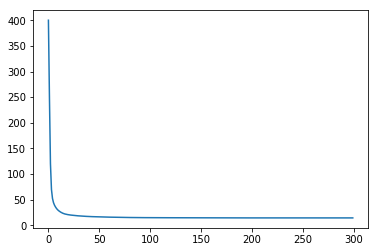

In [11]:
plt.plot(losses)

In [12]:
def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(10,10))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1 + b)/w2  #WT + B = 0
    
    x_p = -(w1*x_1 + b+1)/w2 # WT + B = -1
    x_n = -(w1*x_1 + b -1)/w2 # WT + B = +1
    
    
    plt.plot(x_1,x_2)
    plt.plot(x_1,x_p)
    plt.plot(x_1,x_n)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
    
    

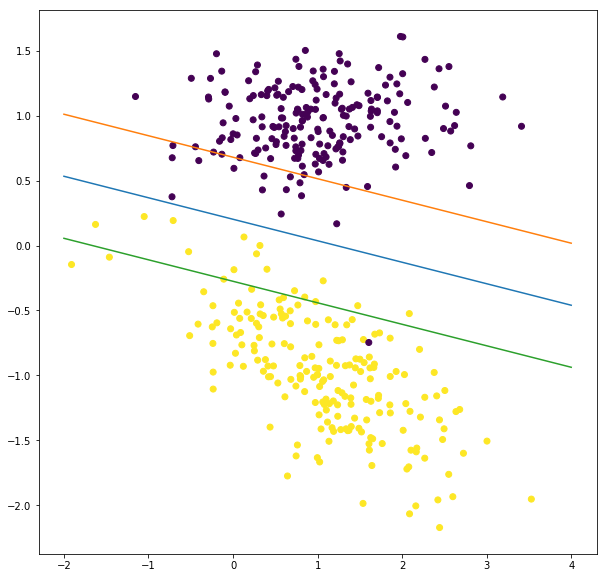

In [13]:
plotHyperplane(W[0,0],W[0,1],B)

In [14]:
my_SVM = SVM(C=1000)
W,b,losses = mySVM.fit(X,Y,max_Itr=100)
print(losses[0])
print(losses[-1])

400.0
14.952930416664646


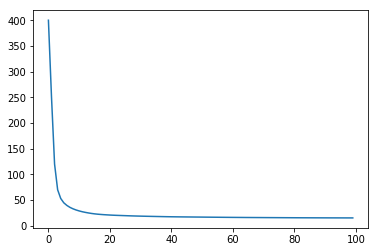

In [15]:
plt.plot(losses)

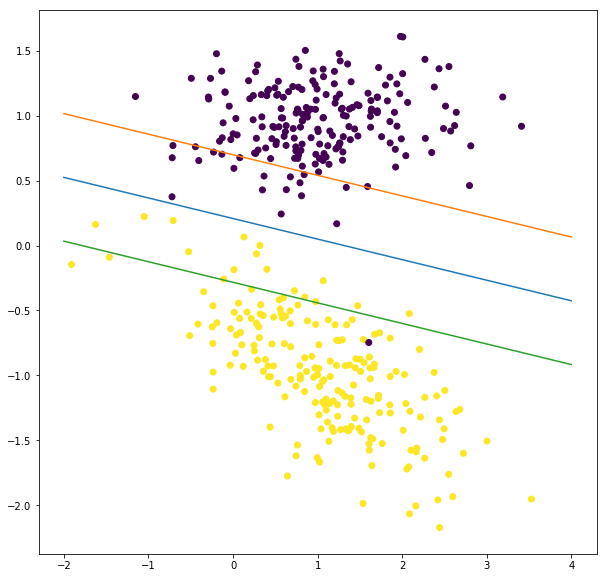

In [16]:
plotHyperplane(W[0,0],W[0,1],B)

# Non - Linear Classification

In [17]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [18]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [19]:
print(X.shape,Y.shape)

(500, 2) (500,)


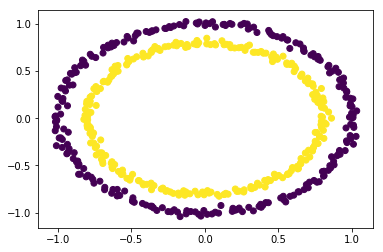

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [21]:
def phi(X):
    """Non Linear Transformation"""
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [22]:
X_ = phi(X)

(500, 3)


In [23]:
def plot3d(X,show=True):
    
    fig = plt.figure(figsize =(10,10))
    
    # Below func returns axis object which is used to make the plot
    # 111 => is the Id for 1x1 grid and 1 graph
    
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    # Depthshade => Adds transperancy to the pixel which are at some depth
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if (show==True):
        plt.show()
    
    return ax

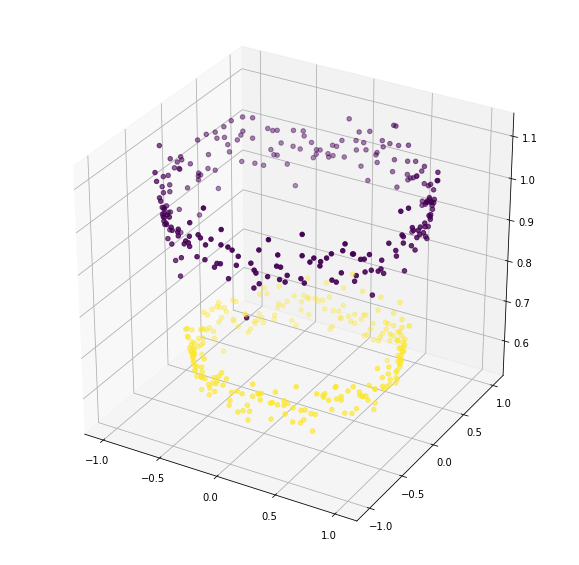

In [24]:
plot3d(X_)

## Logistic Classifier on 2D data

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [26]:
lr = LogisticRegression()

In [27]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.2f"%(acc*100))

Accuracy X(2D) is 45.40


## Logistic Classifier on Higher Dimention i.e. 3D

In [28]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.2f"%(acc*100))

Accuracy X(3D) is 100.00


## Visualise

In [29]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
wts = lr.coef_
print(wts)

[[ 0.05127364 -0.0198     -8.87058357]]


In [31]:
bias=lr.intercept_

In [32]:
# Like we use to do generate datapoints using linspace in 2D , in the same way we generate grid(plane) using meshgrid 
# in 3D model's

xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [33]:
z = -(wts[0][0]*xx + wts[0][1]*yy + bias)/wts[0][2]
print(z)

[[0.80300338 0.80878356 0.81456375 0.82034394]
 [0.80077128 0.80655147 0.81233165 0.81811184]
 [0.79853918 0.80431937 0.81009956 0.81587974]
 [0.79630708 0.80208727 0.80786746 0.81364765]]


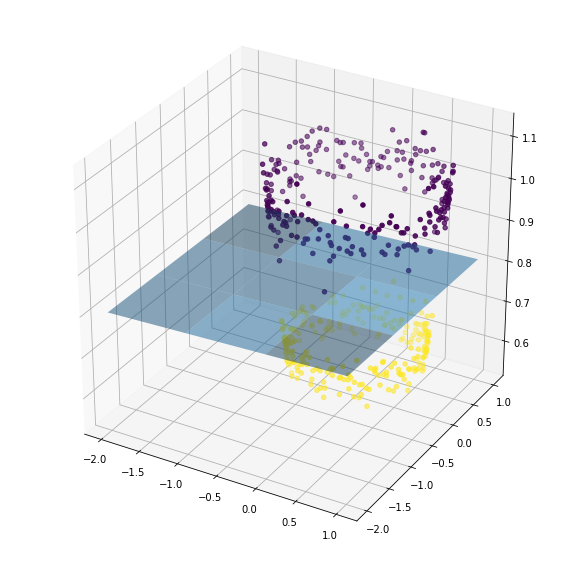

In [34]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=.5)
plt.show()


# Kernel Based Classification in SVM's
### Sklearn supports the following types of Kernels, which can be used in many-real life problems.
- Linear Kernel
- RBF Kernel(Radial Basis Kernel)
- Polynomial Kernel
- Sigmoid Kernel
### Kernel Trick is method of using a linear classifer to solve a non-linear problem. It transforms the linearly inseparable data into linearly separable one.

In [35]:
from sklearn import svm

### Using RBF Kernel (Accuracy => 100%)

In [36]:
svc = svm.SVC(kernel='rbf')

In [37]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
svc.score(X,Y)

1.0

### Using Polynomial Kernel (Accuracy => 56.8%)

In [39]:
svc = svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

0.548

### Using Linear Kernel (Accuracy => 50.6 % )

In [40]:
svc = svm.SVC(kernel='linear')
svc.fit(X,Y)
svc.score(X,Y)

0.502

### Custom Kernel (Accuracy => 100%)

In [41]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

# MNIST Classification

### Grid Search for Best Hyperparameters

In [50]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import multiprocessing

In [52]:
cpus = multiprocessing.cpu_count()
print(cpus)

4


In [43]:
params =[
         {'kernel':['linear','rbf','poly','sigmoid'],
           'C':[0.1,0.2,0.5,1.0,2.0,5.0]
         }
        ]

## Dataset Preperation

In [45]:
data = load_digits()
X = data.data
Y = data.target
print(X.shape,Y.shape)

(1797, 64) (1797,)


## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [47]:
lr = LogisticRegression()
lr.fit(X,Y)
cross_val_score(lr,X,Y,scoring='accuracy',cv=5).mean()

0.9210188113360701

In [48]:
svc = svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring='accuracy',cv=5).mean()

0.44878680061604637

In [53]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid = params,scoring="accuracy",cv=5,n_jobs = cpus)

In [54]:
gs.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
gs.best_estimator_


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
gs.best_score_

0.9699499165275459